In [ ]:
import sys
!{sys.executable} -m pip install numpy tensorflow pydot graphviz

In [2]:
# Import all stuff we need later on

import tempfile
import os

import numpy as np

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, LeakyReLU, concatenate, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


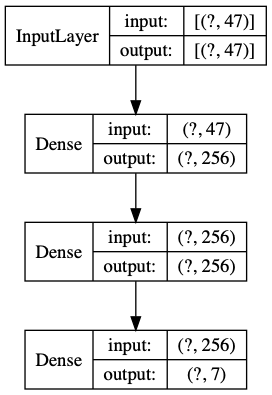

In [3]:
# Create Daniel Matusek's MLP model

matusek_model = Sequential()
matusek_model.add(Dense(256, input_shape=(47,), activation="relu"))
matusek_model.add(Dense(256, activation="relu"))
matusek_model.add(Dense(7, activation="softmax"))
matusek_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

plot_model(matusek_model, show_shapes=True, show_layer_names=False)

In [4]:
# Analyze model size for Daniel Matusek's model

with tempfile.TemporaryDirectory() as tmp_dir:
    filename = f"{tmp_dir}/model.h5"
    matusek_model.save(filename)
    print(f"Matusek model size in Bytes: {os.path.getsize(filename)}")

Matusek model size in Bytes: 335132


2021-07-28 10:37:57.390540: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-07-28 10:37:57.410331: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff1b67f1b30 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-07-28 10:37:57.410350: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


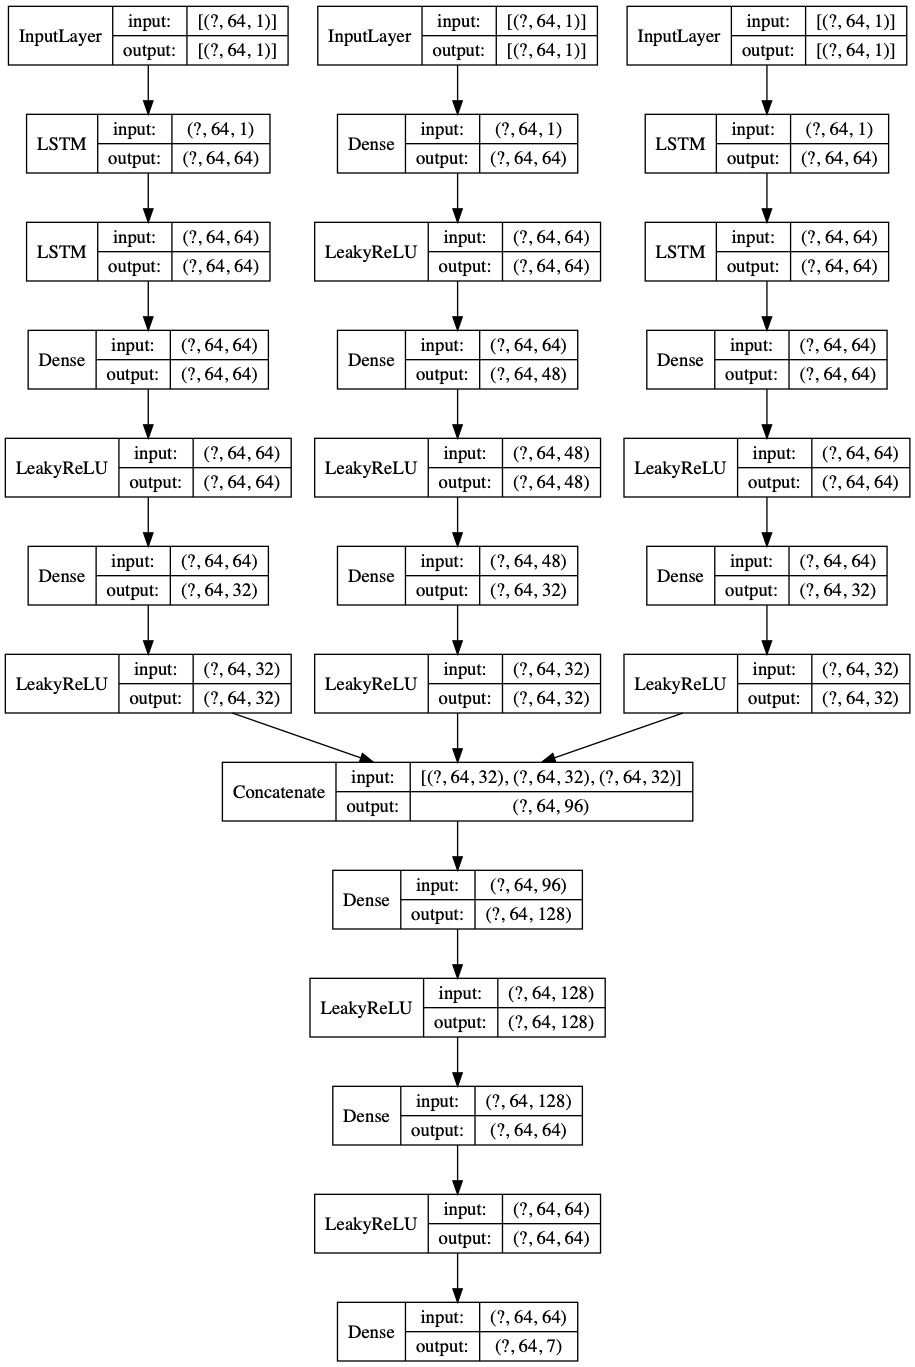

In [6]:
# Create Elias Werner's RNN model

werner_model_left = Sequential()
werner_model_left.add(LSTM(64, input_shape=(64,1), return_sequences=True))
werner_model_left.add(LSTM(64, return_sequences=True))
werner_model_left.add(Dense(64, activation="relu"))
werner_model_left.add(LeakyReLU(alpha=0.05))
werner_model_left.add(Dense(32, activation="relu"))
werner_model_left.add(LeakyReLU(alpha=0.05))

werner_model_center = Sequential()
werner_model_center.add(Dense(64, input_shape=(64,1)))
werner_model_center.add(LeakyReLU(alpha=0.05))
werner_model_center.add(Dense(48, activation="relu"))
werner_model_center.add(LeakyReLU(alpha=0.05))
werner_model_center.add(Dense(32, activation="relu"))
werner_model_center.add(LeakyReLU(alpha=0.05))

werner_model_right = Sequential()
werner_model_right.add(LSTM(64, input_shape=(64,1), return_sequences=True))
werner_model_right.add(LSTM(64, return_sequences=True))
werner_model_right.add(Dense(64, activation="relu"))
werner_model_right.add(LeakyReLU(alpha=0.05))
werner_model_right.add(Dense(32, activation="relu"))
werner_model_right.add(LeakyReLU(alpha=0.05))

werner_model_conc = concatenate([
    werner_model_left.output,
    werner_model_center.output,
    werner_model_right.output
], axis=-1)
werner_model_conc = Dense(128, activation="relu")(werner_model_conc)
werner_model_conc = LeakyReLU(alpha=0.05)(werner_model_conc)
werner_model_conc = Dense(64, activation="relu")(werner_model_conc)
werner_model_conc = LeakyReLU(alpha=0.05)(werner_model_conc)
werner_model_conc = Dense(7, activation="softmax")(werner_model_conc)

werner_model = Model(inputs=[
    werner_model_left.input,
    werner_model_center.input,
    werner_model_right.input
], outputs=werner_model_conc)

werner_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

plot_model(werner_model, show_shapes=True, show_layer_names=False)

In [8]:
# Analyze the model size for Elias Werner's model

with tempfile.TemporaryDirectory() as tmp_dir:
    filename = f"{tmp_dir}/model.h5"
    werner_model.save(filename)
    print(f"Werner model size in Bytes: {os.path.getsize(filename)}")


Werner model size in Bytes: 635360


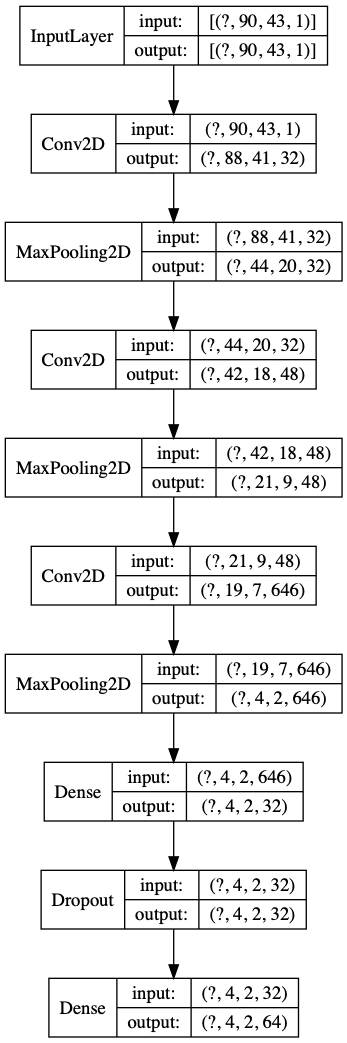

In [9]:
# Create Viktor Stojanov's model
# Not enough clarity: location of dropout and l2, order of conv dims

stojanov_model = Sequential()
stojanov_model.add(Conv2D(32, (3,3), activation="relu", input_shape=(90,43,1)))
stojanov_model.add(MaxPooling2D((2, 2)))
stojanov_model.add(Conv2D(48, (3,3), activation="relu"))
stojanov_model.add(MaxPooling2D((2, 2)))
stojanov_model.add(Conv2D(646, (3,3), activation="relu"))
stojanov_model.add(MaxPooling2D(2, 5))
stojanov_model.add(Dense(32))
stojanov_model.add(Dropout(0.5))
stojanov_model.add(Dense(64, activation="softmax"))

stojanov_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

plot_model(stojanov_model, show_shapes=True, show_layer_names=False)

In [10]:
with tempfile.TemporaryDirectory() as tmp_dir:
    filename = f"{tmp_dir}/model.h5"
    stojanov_model.save(filename)
    print(f"Stojanov model size in Bytes: {os.path.getsize(filename)}")

Stojanov model size in Bytes: 1295936
